## physics4481-7681/cs4812 ps2 problem 1
### due Tues 39 Sep 23:00 via gradescope (two days after the rest of ps2)

This is the first problem of ps2 -- the remaining problems will be posted as a text file.

In this exercise, you will implement the GHZ game, discussed in the 2nd half of [lec 7](https://courses.cit.cornell.edu/physics4481-7681_2021fa/lec7_wb.pdf). If the qubits were far away from each other, this would be a demonstration of "spooky action at a distance". They will instead be adjacent qubits, since that is what we have available via the IBM cloud resources.

First recall the instructions from [ps0](https://nbviewer.jupyter.org/url/courses.cit.cornell.edu/physics4481-7681_2021fa/ps0.ipynb): <blockquote>go to [quantum-computing.ibm.com](https://quantum-computing.ibm.com/) and sign up for an IBMid, using your Cornell netid email address when registering. (So we can add you to the project for this course. Everyone in the course will need an account to be able to run circuit assignments. Once you have registered, you should see this course listed among your projects -- otherwise please post a private message to Ed requesting to be added.)
Then log in and launch IBM Quantum Lab. You can upload this (already downloaded) Jupyter notebook and double-click to open (or you can access the cloud resources running your notebook locally, use `pip install qiskit` to install qiskit).</blockquote>  

[We will add additional instructions here to respond to any difficulties you have: please post questions on Ed, and note that Eliott R. will hold his usual study halls next week Mon/Wed 1:30-2:30pm in Clark 294C.]

<blockquote>Pick a quantum device. In the menu at the top left of the screen, click on `Services` (open it in a new tab). Then click on `systems`. Change the drop-down selection from `All systems` to `Your systems`. Pick one of the 5-qubit devices that is online. If you click on it, you see some important information. The basis gates are the gates that can be natively implemented on the device. All other gates must be decomposed in terms of these (Qiskit's transpiler can do this for you). See [this](https://qiskit.org/documentation/apidoc/circuit_library.html) page for a list of all of the gates supported by Qiskit, including the basis gates that you see here, and [this](https://qiskit.org/documentation/apidoc/transpiler.html) page for information about Qiskit's transpiler. You also see a diagram of the device. Two-qubit gates can only be applied between qubits that are connected in this diagram. (Two-qubit gates between other qubits can be decomposed in terms of these gates.) Finally, note the error rates. CNOT error rates measure the error rate from applying a CNOT gate, and readout assignment error rates measure the probability that a final state of 0 is erroneously recorded as 1 or vice versa. (These specific cases are also reported as `Prob meas0 prep1` and `Prob meas1 prep0`.</blockquote>

# 1.
Pick three connected qubits to use for this game such that the middle qubit is connected to both of the other two qubits. Pick them so that the readout assignment error rates on both qubits and the CNOT error rates between the qubits are both relatively low. Fill in this information below:

In [13]:
# change to the ones you pick
device_name = 'ibm_lagos'  # e.g. 'ibmq_lima'
qubits = [0,1,2]       # e.g. [0,1,2]

With the device properties still open, click on `Your access providers`. You should see `ibm-q-education/cornell-uni-2/physics-4481` as one of the providers. That means that you have been successfully added to the project for this course. You can also see the variables `max shots` and `max circuits`. `shots` is the number of times that each circuit is run, and `max_circuits` is the maximum number of circuits that can be sent to the quantum computer at once, in a single job. See [this](https://quantum-computing.ibm.com/services/docs/services/manage/systems/execution) page for more information. It is more efficient (in terms of run time) to increase the number of shots than to run a circuit multiple times. However, in the GHZ game, Alice, Bob, and Charlie only have one shot each time they receive $r$, $s$, and $t$, so we will set `shots = 1` for now. Fill in the following from what you see in the device properties:

In [2]:
max_circuits = 900  # e.g., 75
max_shots =    8192   # e.g., 8192

Next, generate a numpy array, `x`, of length `max_circuits` containing random integers from 0 to 3 (inclusive). 0 will correspond to r,s,t = 0,0,0; 1 to r,s,t = 0,1,1; 2 to r,s,t = 1,0,1; and 3 to r,s,t = 1,1,0.

In [5]:
import numpy as np
## generate x using np.random.randint()
x = np.random.randint(0, 3, max_circuits)
print(x)

[1 0 2 0 2 1 0 2 2 0 2 0 0 0 2 2 0 1 1 1 0 2 2 2 2 2 2 2 2 0 1 1 2 1 0 1 2
 1 0 1 1 1 1 2 2 0 0 2 0 1 0 0 2 1 0 1 2 0 0 1 2 1 1 0 0 1 2 2 2 2 1 1 1 1
 1 1 2 0 2 1 0 2 1 2 1 2 1 0 2 1 1 2 0 2 2 1 1 2 2 0 1 1 1 0 1 1 1 2 0 1 0
 0 2 0 2 0 2 2 0 1 1 2 2 1 1 2 2 0 0 2 2 2 1 2 2 2 0 2 0 1 1 1 2 0 2 1 1 0
 0 0 0 1 1 0 0 1 0 2 0 0 1 0 0 2 2 1 0 2 0 1 0 0 1 2 2 2 1 1 2 1 2 2 0 1 1
 0 1 2 1 1 2 1 2 2 0 1 1 1 0 2 2 2 1 0 0 0 1 2 1 1 1 2 2 2 1 0 1 1 0 0 2 0
 0 0 2 2 0 1 2 2 2 1 2 0 2 0 0 2 2 0 0 2 1 2 2 1 2 1 2 1 0 0 1 2 1 1 0 0 2
 1 1 1 0 1 2 0 2 0 2 1 1 0 1 0 1 2 2 0 0 1 1 2 1 0 0 1 1 0 2 2 1 1 1 0 0 2
 0 1 1 0 2 0 1 0 0 0 1 1 0 0 2 1 2 2 1 0 1 2 2 1 2 0 1 1 2 2 2 0 0 1 2 2 1
 0 1 1 0 2 2 2 0 2 1 0 1 1 2 0 1 1 2 2 1 0 0 2 2 1 0 1 1 1 2 1 1 1 2 1 2 0
 0 0 0 1 0 0 0 1 1 1 1 2 0 2 1 2 1 0 1 1 0 2 2 2 2 2 2 0 0 0 2 2 0 0 1 0 1
 2 1 0 0 0 0 1 1 2 2 2 2 1 0 1 2 1 1 1 2 2 1 1 0 1 0 1 1 0 2 0 1 1 1 2 2 1
 2 1 1 1 0 2 0 0 2 2 1 2 0 0 2 2 1 2 2 1 2 0 1 0 2 2 1 2 0 1 1 0 2 1 1 0 1
 0 1 1 1 2 0 1 1 1 1 1 2 

Next, we'll generate a list of circuits to send to the device. Understand and complete the following code. [This](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html) page may be helpful.

See also [qiskit circuit tutorials](https://qiskit.org/documentation/tutorials/circuits/index.html)
(and other linked tutorials, including
[advanced circuit tutorials](https://qiskit.org/documentation/tutorials/circuits_advanced/index.html)
and [quantum operations](https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html) ).

With qubits from top to bottom labelled as Alice, Bob, Charlie, for the i'th circuit the code associates r,s,t = (0,0,0) to x[i]=0, and r,s,t = (1,0,0), (0,1,0), (0,0,1) to x[i] = 1,2,3, resp., as noted above.

In [6]:
from qiskit import QuantumCircuit

qc_all = []
for i in range(max_circuits):
    qc = QuantumCircuit(3,3) 
      #  Creates a quantum circuit with three quantum registers (first argument)
      #      and three classical registers (second argument).
      #  The quantum registers are the qubits, and the classical registers store measurment outcomes.
    qc.h(1) # apply a Hadamard to qubit 0
    qc.cx(1,0) # apply a CNOT with qubit 1 as the control qubit and qubit 0 as the target qubit.
    qc.cx(1,2) # apply a CNOT with qubit 1 as the control qubit and qubit 2 as the target qubit.
    qc.barrier()
    # Now we have set up a GHZ state.
    if x[i] == 1:
        qc.sdg([1,2])
    elif x[i] == 2:
        qc.sdg([0,2])
    elif x[i] == 3:
        qc.sdg([0,1])
    qc.h(range(3))
    qc.barrier()
    qc.measure(range(3),range(3))
    qc_all.append(qc)

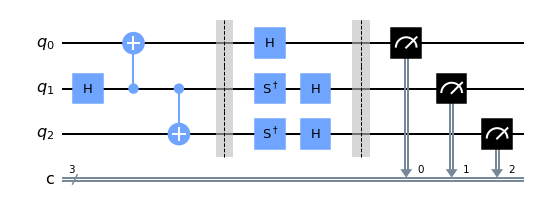

In [7]:
# You can visualize your circuits using
qc_all[0].draw('mpl')

For further documentation see, [circuit_visualization](https://qiskit.org/documentation/tutorials/circuits_advanced/03_advanced_circuit_visualization.html)

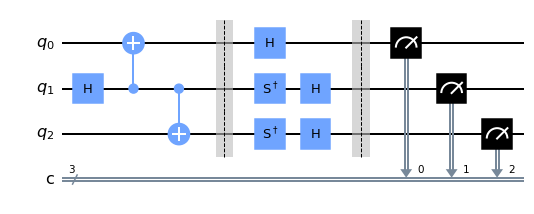

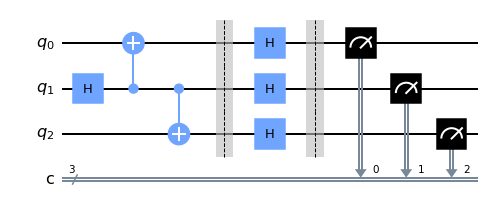

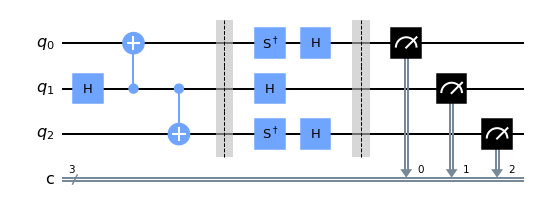

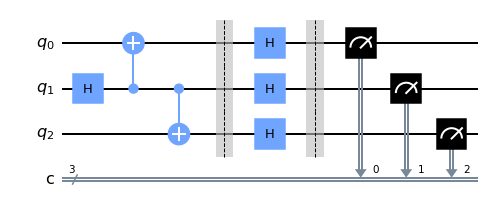

In [8]:
# or visualize the first four as
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(4):
    fig=plt.figure()
    qc_all[i].draw('mpl', ax=plt.gca())

Next, let's execute the circuits on the device and qubits that you chose. Understand the following code. The following pages may help:

https://qiskit.org/documentation/apidoc/execute.html

https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.IBMQBackend.html

In [9]:
from qiskit import IBMQ, execute
IBMQ.load_account() # load your IBMQ credentials
provider = IBMQ.get_provider(hub='ibm-q-education', group='cornell-uni-2', project='physics-4481')

In [14]:
backend = provider.backend.backends(device_name)[0] # the backend is the quantum computer that you picked.
tags = ['GHZ', f'x = {list(x)}'] # set some tags to describe the experiment.

In [15]:
job = execute(qc_all, backend, initial_layout=qubits, job_tags = tags, shots = 1)

This might take some time to go through the queue and run. You can click on `jobs` near the top left of the screen to watch its status. Once it finishes, analyze the result. Fill in the remaining code to compute the fraction of the time (in your sample) that Alice and Bob won. Perform a binomial test to determine whether they beat the classical success rate. See [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binomtest.html) page for documentation of SciPy's function that performs a binomial test. (You are checking to see whether the number of wins `k` for your total number of trials `n` is inconsistent with `p=.75`)

In [31]:
counts = job.result().get_counts() # this returns list of dictionaries of the results for each circuit we executed.

The list returned will be of the form

    [{'001': 1}, {'100': 1}, {'111': 1}, ...]
with only one result per circuit because each was run only once.

You can get a list of the results using

    results = np.array([list(c) for c in counts]).flatten()
    
and check if each result wins the game for the specified value of x (even number of 1's for x=0, otherwise odd number of 1's).

In [17]:
results = np.array([list(c) for c in counts]).flatten()

In [55]:
# Compute the fraction of the time that Alice and Bob won
# define the number of wins to be k
k = 0
for i in range(len(results)):
    if x[i] == 0:
        if sum(int(digit) for digit in results[i]) %2 == 0:
            k += 1
    else:
        if sum(int(digit) for digit in results[i]) %2 == 1:
            k += 1
            
p_quantum = k/len(results)
print("probability of winning", round(k/len(results)*100, 2), "%")
         

probability of winning 95.22 %


In [73]:
# Binomial test to determine whether Alice and BOb beat the classicla success rate
# i.e. the # of wins k for thetotal number of trials n is inconsistent with p=.75
import scipy.stats as stats
p_classical = .75
result = stats.binomtest(k, len(results), p_classical, alternative = 'greater')
print("Binomial test: p-value of the hypothesis", result.pvalue)
if result.pvalue > .05:
    print('The null hypothesis is valid. Alice and Bob cannot beat the classical winnig limit 75%.')
else:
    print("The null hypothesis is rejected.\and the alternatice hypothesis is valid.\nAlice and Bob can beat the calssical winnig limit 75%!")


Binomial test: p-value of the hypothesis 8.276910253591913e-60
The null hypothesis is rejected.nd the alternatice hypothesis is valid.
Alice and Bob can beat the calssical winnig limit 75%!
